## Regression Problem: Student Performance

In [1]:
import numpy as np
import pandas as pd

### To-do:
1. Data prep
2. EDA
3. Validation framework
4. X preparation
5. Model training
6. RMSE
7. Validating
8. Testing

## 1. Data prep

In [4]:
df = pd.read_csv("../data/student-por.csv", sep=";")

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

In [16]:
cat_cols = list(df.dtypes[df.dtypes == "object"].index)

In [17]:
for c in cat_cols:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [19]:
df.head().T

,0,1,2,3,4
school,gp,gp,gp,gp,gp
sex,f,f,f,f,f
age,18,17,15,15,16
address,u,u,u,u,u
famsize,gt3,gt3,le3,gt3,gt3
pstatus,a,t,t,t,t
medu,4,1,1,4,3
fedu,4,1,1,2,3
mjob,at_home,at_home,at_home,health,other
fjob,teacher,other,other,services,other


### 2. EDA

In [26]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
for c in df.columns:
    display(c)
    display(df[c].unique()[:5])
    display(df[c].nunique())

'school'

array(['gp', 'ms'], dtype=object)

2

'sex'

array(['f', 'm'], dtype=object)

2

'age'

array([18, 17, 15, 16, 19])

8

'address'

array(['u', 'r'], dtype=object)

2

'famsize'

array(['gt3', 'le3'], dtype=object)

2

'pstatus'

array(['a', 't'], dtype=object)

2

'medu'

array([4, 1, 3, 2, 0])

5

'fedu'

array([4, 1, 2, 3, 0])

5

'mjob'

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

5

'fjob'

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

5

'reason'

array(['course', 'other', 'home', 'reputation'], dtype=object)

4

'guardian'

array(['mother', 'father', 'other'], dtype=object)

3

'traveltime'

array([2, 1, 3, 4])

4

'studytime'

array([2, 3, 1, 4])

4

'failures'

array([0, 3, 1, 2])

4

'schoolsup'

array(['yes', 'no'], dtype=object)

2

'famsup'

array(['no', 'yes'], dtype=object)

2

'paid'

array(['no', 'yes'], dtype=object)

2

'activities'

array(['no', 'yes'], dtype=object)

2

'nursery'

array(['yes', 'no'], dtype=object)

2

'higher'

array(['yes', 'no'], dtype=object)

2

'internet'

array(['no', 'yes'], dtype=object)

2

'romantic'

array(['no', 'yes'], dtype=object)

2

'famrel'

array([4, 5, 3, 1, 2])

5

'freetime'

array([3, 2, 4, 1, 5])

5

'goout'

array([4, 3, 2, 1, 5])

5

'dalc'

array([1, 2, 5, 3, 4])

5

'walc'

array([1, 3, 2, 4, 5])

5

'health'

array([3, 5, 1, 2, 4])

5

'absences'

array([ 4,  2,  6,  0, 10])

24

'g1'

array([ 0,  9, 12, 14, 11])

17

'g2'

array([11, 13, 14, 12, 16])

16

'g3'

array([11, 12, 14, 13, 17])

17

<Axes: xlabel='g3', ylabel='Count'>

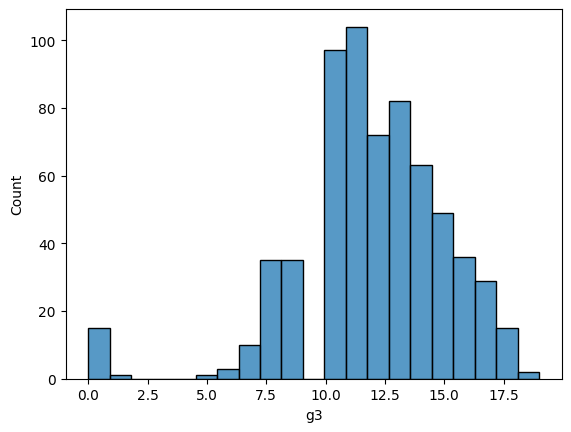

In [27]:
sns.histplot(df.g3)

<Axes: xlabel='g3', ylabel='Count'>

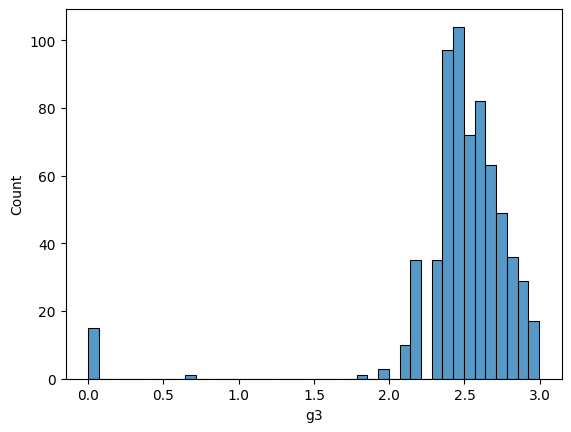

In [29]:
sns.histplot(np.log1p(df.g3))

In [31]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

### 3. Validation framework

In [36]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - df_val - df_test

n_train, n_val, n_test

(391, 129, 129)

In [39]:
idx = np.arange(n)

np.random.seed(3)
np.random.shuffle(idx)

In [41]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

len(df_train), len(df_val), len(df_test)

(391, 129, 129)

In [42]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [44]:
y_train = np.log1p(df_train.g3.values)
y_val = np.log1p(df_val.g3.values)
y_test = np.log1p(df_test.g3.values)

In [45]:
del df_train["g3"]
del df_val["g3"]
del df_test["g3"]

### 4. X preparation

In [73]:
cat_vars = df_train.dtypes[df.dtypes == "object"].index
num_vars = df_train.dtypes[df.dtypes != "object"].index
num_vars

Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2'],
      dtype='object')

In [62]:
cat_cols = {}

for c in cat_vars:
    cat_cols[c] = list(df_train[c].value_counts().index)

cat_cols

{'school': ['gp', 'ms'],
 'sex': ['f', 'm'],
 'address': ['u', 'r'],
 'famsize': ['gt3', 'le3'],
 'pstatus': ['t', 'a'],
 'mjob': ['other', 'services', 'at_home', 'teacher', 'health'],
 'fjob': ['other', 'services', 'at_home', 'teacher', 'health'],
 'reason': ['course', 'home', 'reputation', 'other'],
 'guardian': ['mother', 'father', 'other'],
 'schoolsup': ['no', 'yes'],
 'famsup': ['yes', 'no'],
 'paid': ['no', 'yes'],
 'activities': ['no', 'yes'],
 'nursery': ['yes', 'no'],
 'higher': ['yes', 'no'],
 'internet': ['yes', 'no'],
 'romantic': ['no', 'yes']}

In [74]:
def prepare_X(df):
    df_num = df.copy()

    features = list(num_vars)
    for n, l in cat_cols.items():
        for v in l:
            df_num[f"{n}_{v}"] = (df_num[n] == v).astype(int)
            features.append(f"{n}_{v}")
    
    df_num = df_num[features].fillna(0)
    X = df_num.values

    return X

In [76]:
X_train = prepare_X(df_train)
X_train

array([[17,  2,  4, ...,  0,  0,  1],
       [16,  4,  2, ...,  0,  0,  1],
       [17,  3,  3, ...,  0,  1,  0],
       ...,
       [16,  2,  2, ...,  1,  0,  1],
       [16,  2,  3, ...,  0,  1,  0],
       [16,  1,  1, ...,  0,  1,  0]], shape=(391, 58))

### 5. Model training